# Logistic Regression

## Part 1 - Data Preprocessing

### Importing all necessary libraries, modules and class

In [1]:
# import pandas library to read .csv / .xlsx file
# getting the library scikitlearn, the module model_selection and the function train_test_split for training and testing the X and y variables

# import matplotlib for plotting
# from scikitlearn library, get the linear_model module to import LogisticRegression class to build and train the model
# from scikitlearn library, get the accuracy_score,ConfusionMatrixDisplay and confusion_matrix for getting the accuracy of the model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

### Importing the dataset

In [2]:
# importing the dataset

dataset = pd.read_csv("Iris Classification.csv")

In [3]:
# display the data

dataset.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# displaying the information of the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Getting the inputs and output

In [5]:
# getting X and y variables

X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [6]:
# display X

X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# display y

y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

### Plotting box plots for each measurement grouped by specied

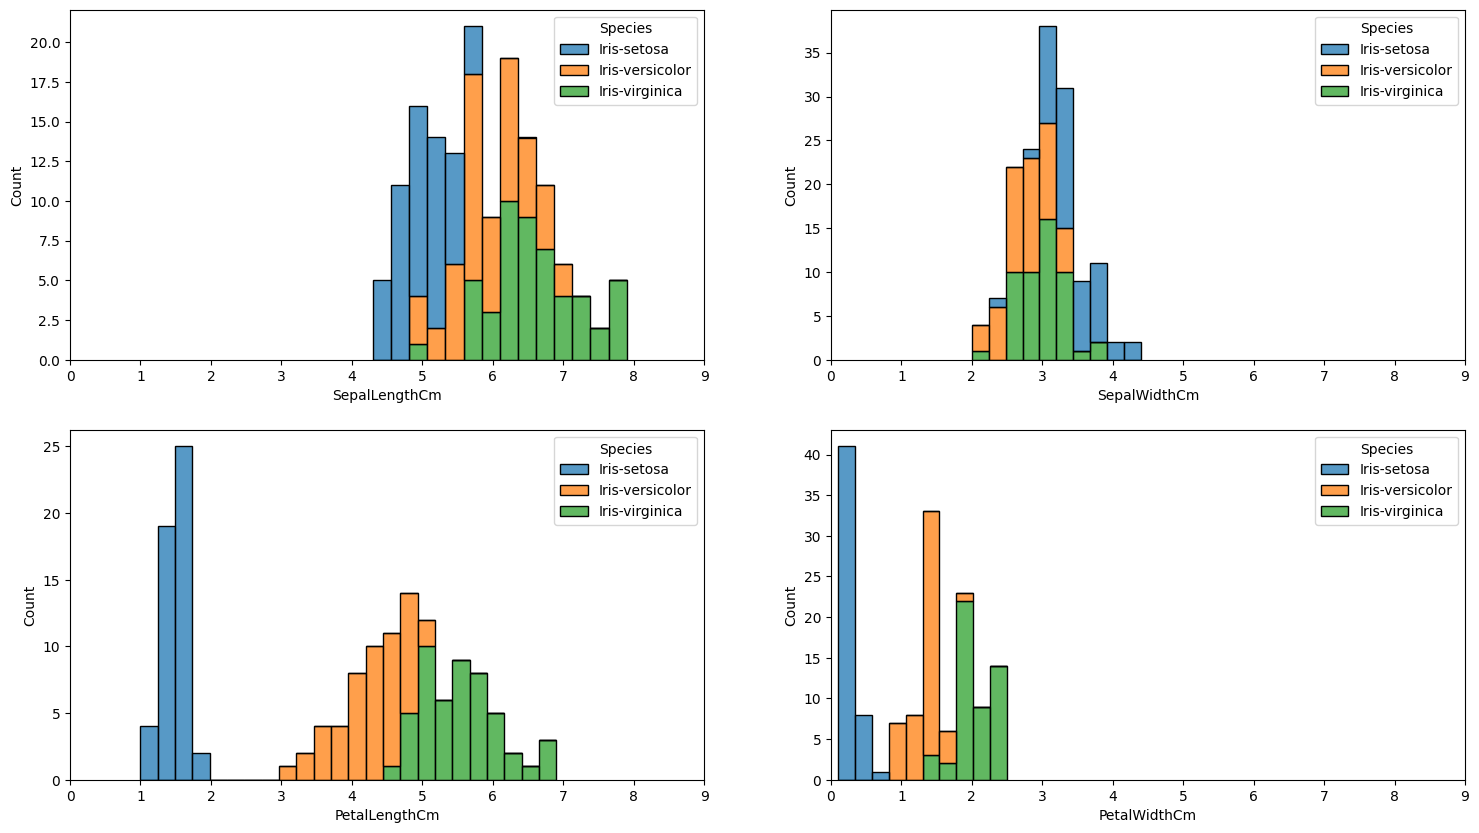

In [8]:
# Histogram for iris classification parameters
plt.figure(figsize = (18, 10))

plt.subplot(221)
sns.histplot(data = dataset, x = 'SepalLengthCm', hue = 'Species', binwidth = 0.25, multiple = 'stack')
plt.xlim(0, 9)

plt.subplot(222)
sns.histplot(data = dataset, x = 'SepalWidthCm', hue = 'Species', binwidth = 0.25, multiple = 'stack')
plt.xlim(0, 9)

plt.subplot(223)
sns.histplot(data = dataset, x = 'PetalLengthCm', hue = 'Species', binwidth = 0.25, multiple = 'stack')
plt.xlim(0, 9)

plt.subplot(224)
sns.histplot(data = dataset, x = 'PetalWidthCm', hue = 'Species', binwidth = 0.25, multiple = 'stack')
plt.xlim(0, 9)

plt.show()

### Creating the Training Set and the Test Set

In [9]:
# Training and testing The X and y variables

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state=121)

In [10]:
X_train

array([[6.3, 2.8, 5.1, 1.5],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 2.5, 4.9, 1.5],
       [5. , 3.5, 1.3, 0.3],
       [5.2, 3.5, 1.5, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.1, 3. , 4.6, 1.4],
       [6.7, 3. , 5. , 1.7],
       [5. , 3.4, 1.6, 0.4],
       [6.5, 3. , 5.2, 2. ],
       [6.7, 3.3, 5.7, 2.5],
       [5. , 2.3, 3.3, 1. ],
       [5.4, 3.4, 1.5, 0.4],
       [4.4, 3.2, 1.3, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.1, 3.5, 1.4, 0.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3. , 5.5, 2.1],
       [4.6, 3.6, 1. , 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [6.1, 2.8, 4.7, 1.2],
       [5.8, 2.8, 5.1, 2.4],
       [5.9, 3. , 5.1, 1.8],
       [6.3, 3.3, 4.7, 1.6],
       [5.4, 3. , 4.5, 1.5],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [6.4, 2.8, 5.6, 2.1],
       [5.6, 2.5, 3.9, 1.1],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2

In [11]:
X_test

array([[7. , 3.2, 4.7, 1.4],
       [6.2, 3.4, 5.4, 2.3],
       [6. , 3.4, 4.5, 1.6],
       [4.6, 3.4, 1.4, 0.3],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.6, 4. , 1.2],
       [5.6, 2.9, 3.6, 1.3],
       [5.7, 2.6, 3.5, 1. ],
       [5.2, 2.7, 3.9, 1.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.9, 3.2, 4.8, 1.8],
       [5.5, 2.3, 4. , 1.3],
       [6.6, 2.9, 4.6, 1.3],
       [4.6, 3.2, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.3, 3.4, 5.6, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5. , 3. , 1.6, 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [5.4, 3.9, 1.7, 0.4],
       [6.4, 2.7, 5.3, 1.9],
       [6.3, 2.5, 5. , 1.9],
       [6. , 2.9, 4.5, 1.5],
       [5.1, 2.5, 3. , 1.1],
       [5.5, 2.6, 4.4, 1.2],
       [5.5, 2.5, 4. , 1.3],
       [5. , 3.3, 1.4, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [7.9, 3.8, 6.4, 2. ],
       [7.1, 3. , 5.9, 2.1],
       [6.7, 3.1, 4.7, 1.5],
       [7.7, 2.6, 6.9, 2.3],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [6.4, 2

In [12]:
y_train

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-s

In [13]:
y_test

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica'], dtype=object)

### Feature Scaling

In [14]:
# use standad scaler for equal importance of all features

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [15]:
X_train

array([[ 0.55596763, -0.57451362,  0.75413358,  0.41295435],
       [ 1.15286539,  0.37546953,  1.19961333,  1.45464101],
       [-1.23472565,  0.8504611 , -1.02778542, -1.27978647],
       [ 0.55596763, -1.28700097,  0.64276364,  0.41295435],
       [-0.99596655,  1.08795689, -1.36189524, -1.14957563],
       [-0.75720745,  1.08795689, -1.2505253 , -1.27978647],
       [-1.71224386, -0.09952204, -1.36189524, -1.27978647],
       [-0.16030968,  3.22541896, -1.2505253 , -1.0193648 ],
       [ 0.31720852, -0.09952204,  0.47570873,  0.28274352],
       [ 1.03348584, -0.09952204,  0.69844861,  0.67337602],
       [-0.99596655,  0.8504611 , -1.19484033, -1.0193648 ],
       [ 0.79472673, -0.09952204,  0.80981855,  1.06400852],
       [ 1.03348584,  0.61296531,  1.08824339,  1.71506268],
       [-0.99596655, -1.76199255, -0.24819586, -0.23809981],
       [-0.51844834,  0.8504611 , -1.2505253 , -1.0193648 ],
       [-1.71224386,  0.37546953, -1.36189524, -1.27978647],
       [ 0.43658808, -0.

## Part 2 - Building and training the model

### Building the model

In [16]:
# Build the model

model = LogisticRegression(max_iter=1000)


# set iteration to 1000 iterations for the solver to converge to the optimal solution
# the class logistics regression is defaulted to handle multinomial logistic regression

### Training the model

In [17]:
# train the model

model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

### Inference

Making the predictons of the data points in the test set

In [18]:
y_pred = model.predict(sc.transform(X_test))
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [19]:
y_test

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica'], dtype=object)

### Making the prediction for each type


In [20]:
model.predict(sc.transform([[5.4, 3.9, 1.7, 0.2]])) # predicting iris setosa


array(['Iris-setosa'], dtype=object)

In [21]:
model.predict(sc.transform([[6.4, 2.9, 4.3, 1.3]])) # predicting iris versicolor

array(['Iris-versicolor'], dtype=object)

In [22]:
model.predict(sc.transform([[6.7, 3.3, 5.7, 2.1]])) # predicting iris virginica

array(['Iris-virginica'], dtype=object)

## Part 3: Evaluating the model 

### Confusion Matrix

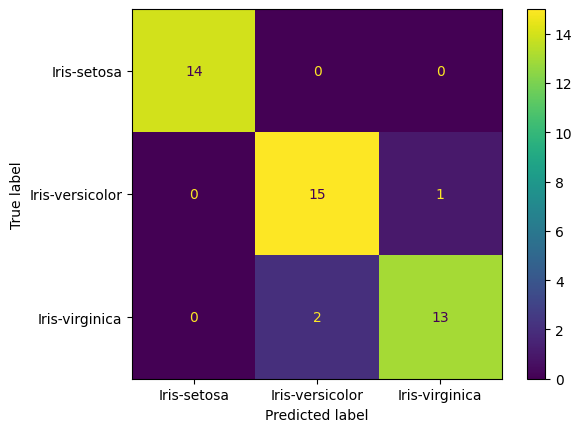

In [23]:
# Create a confusion matrix to visualize the results of the model.

# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=model.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

### Accuracy

In [24]:
# manual computation for accuracy

(14+15+13)/(14+15+13+2+1)

# based on the manual computaion for accuracy score, this model is very  good

0.9333333333333333

In [25]:
# using sklearn 

accuracy_score(y_test, y_pred)

# based on the built-in computaion for accuracy score, this model is very  good and matches the same as the manual computation

0.9333333333333333

### Creating classifcations report

In [26]:
# Create classification report for logistic regression model

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.94      0.91        16
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.94        45
   weighted avg       0.93      0.93      0.93        45

